In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#importamos librería
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,MinMaxScaler

In [ ]:
df_seguro=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Clase 3 - Preprocesamiento/Datasets/dataset_seguros_sin_nulos.csv", sep=";")

In [ ]:
df_seguro = pd.read_csv('/content/drive/MyDrive/DataScience/Limpieza de datos/Clases/Clase 2 - Preprocesamiento/Datasets/dataset_seguros_sin_nulos.csv', sep=';')

In [ ]:
'''1. ESTRUCTURA DE DATOS '''

In [ ]:
df_seguro.info()
df_seguro.describe()

df_seguro.shape

df_seguro.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   EDAD         1338 non-null   int64  
 1   SEXO         1338 non-null   object 
 2   IMC          1338 non-null   float64
 3   PESO         1338 non-null   int64  
 4   HIJOS        1338 non-null   int64  
 5   TIENE_HIJOS  1338 non-null   int64  
 6   FUMADOR      1338 non-null   object 
 7   CIUDAD       1338 non-null   object 
 8   PRECIO       1338 non-null   int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 94.2+ KB


,EDAD,SEXO,IMC,PESO,HIJOS,TIENE_HIJOS,FUMADOR,CIUDAD,PRECIO
0,37,MASCULINO,29.830,80,2,1,NO,BARCELONA,534
1,25,MASCULINO,26.220,71,0,0,NO,BARCELONA,227
2,52,FEMENINO,30.780,83,1,1,NO,BARCELONA,900
3,23,MASCULINO,23.845,64,0,0,NO,BARCELONA,200
4,60,FEMENINO,36.005,97,0,0,NO,BARCELONA,1102


In [ ]:
'''2. DETECCION DE NULOS'''

In [ ]:
df_seguro.isnull().sum()

EDAD           0
SEXO           0
IMC            0
PESO           0
HIJOS          0
TIENE_HIJOS    0
FUMADOR        0
CIUDAD         0
PRECIO         0
dtype: int64

In [ ]:
'''3. VERIFICAMOS FILAS REPETIDAS'''

In [ ]:
df_seguro[df_seguro.duplicated(keep=False)]

In [ ]:
df_seguro_sin_duplicados=df_seguro.drop_duplicates().copy()
df_seguro_sin_duplicados.reset_index(drop=True, inplace=True)
df_seguro_sin_duplicados

In [ ]:
'''4. ANALISIS UNIVARIABLE'''

In [ ]:
for i in df_seguro_sin_duplicados.columns:
    print('\n',i,df_seguro_sin_duplicados[i].unique(),'\n')

In [ ]:
for i in df_seguro_sin_duplicados.columns:
    print('\n',i,df_seguro_sin_duplicados[i].value_counts(),'\n')

In [ ]:
'''5. SEPARAMOS NUESTRAS VARIABLES EN: TARGET, CATEGORICAS, BOOLEAN Y NUMERICAS'''

In [ ]:
target= ["PRECIO"]

In [ ]:
def obtener_lista_variables(dataset):
    lista_numericas=[]
    lista_boolean=[]
    lista_categoricas=[]
    for i in dataset:
        if    (dataset[i].dtype.kind=="f" or dataset[i].dtype.kind=="i") and len(dataset[i].unique())!= 2  and i not in target:
              lista_numericas.append(i)
        elif  (dataset[i].dtype.kind=="f" or dataset[i].dtype.kind=="i")  and len(dataset[i].unique())== 2  and i not in target:
              lista_boolean.append(i)
        elif  (dataset[i].dtype.kind=="O")  and i not in target:
              lista_categoricas.append(i)

    return lista_numericas, lista_boolean, lista_categoricas

In [ ]:

lista_numericas, lista_boolean, lista_categoricas= obtener_lista_variables(df_seguro_sin_duplicados)


lista_categoricas


['SEXO', 'FUMADOR', 'CIUDAD']

In [ ]:
lista_numericas


['EDAD', 'IMC', 'PESO', 'HIJOS']

In [ ]:
lista_boolean

['TIENE_HIJOS']

In [ ]:
print(len(df_seguro_sin_duplicados.columns), "total de variables")
print(len(target), "variable a predecir")
print(len(lista_categoricas), "variables categóricas")
print(len(lista_boolean), "variables boolean")
print(len(lista_numericas), "variables numéricas")

9 total de variables
1 variable a predecir
3 variables categóricas
1 variables boolean
4 variables numéricas


In [ ]:
'''6. LOGICA DE LAS VARIABLES'''

In [ ]:
df_seguro_sin_duplicados.info()

for i in df_seguro_sin_duplicados:
    if  df_seguro_sin_duplicados[i].dtype.kind=="f" or df_seguro_sin_duplicados[i].dtype.kind=="i":
        df_seguro_sin_duplicados.hist(column=i)

In [ ]:
df_seguro_sin_duplicados[df_seguro_sin_duplicados["PRECIO"]>4000]

,EDAD,SEXO,IMC,PESO,HIJOS,TIENE_HIJOS,FUMADOR,CIUDAD,PRECIO
63,54,MASCULINO,40.565,109,3,1,SI,BARCELONA,4046
79,61,FEMENINO,36.385,98,1,1,SI,BARCELONA,4043
139,31,FEMENINO,38.095,102,1,1,SI,BARCELONA,4881
512,33,FEMENINO,35.530,96,0,0,SI,SEVILLA,4595
622,52,MASCULINO,34.485,93,3,1,SI,SEVILLA,5002
782,44,FEMENINO,38.060,102,0,0,SI,MADRID,4074
794,57,MASCULINO,42.130,113,1,1,SI,MADRID,4056
802,54,FEMENINO,47.410,128,0,0,SI,MADRID,5314
900,60,MASCULINO,40.920,110,0,0,SI,MADRID,4056
939,59,MASCULINO,41.140,111,1,1,SI,MADRID,4081


In [ ]:
df_seguro_clean=df_seguro_sin_duplicados.copy()

In [ ]:
'''7. PREPROCESAMIENTO'''

In [ ]:
'''7.1 CORRELACION: DETECTAR SI HAY VARIABLES QUE EXPLICAN LO MISMO'''


In [ ]:
corr = df_seguro_clean.corr()


<ipython-input-26-e1c84e5b8b95>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df_seguro_clean.corr()


In [ ]:
corr.style.background_gradient(cmap='coolwarm')


,EDAD,IMC,PESO,HIJOS,TIENE_HIJOS,PRECIO
EDAD,1.000000,0.107742,0.110609,0.041016,0.044213,0.298308
IMC,0.107742,1.000000,0.997731,0.011157,0.013901,0.197793
PESO,0.110609,0.997731,1.000000,0.013540,0.015882,0.199910
HIJOS,0.041016,0.011157,0.013540,1.000000,0.788314,0.065633
TIENE_HIJOS,0.044213,0.013901,0.015882,0.788314,1.000000,0.061246
PRECIO,0.298308,0.197793,0.199910,0.065633,0.061246,1.000000


In [ ]:
#hay una fuerte correlación entre el peso y el IMC, eliminamos el peso ya que el IMC tiene más datos del cliente como la altura
del(df_seguro_clean["PESO"])

In [ ]:
df_seguro_clean

,EDAD,SEXO,IMC,HIJOS,TIENE_HIJOS,FUMADOR,CIUDAD,PRECIO
0,37,MASCULINO,29.830,2,1,NO,BARCELONA,534
1,25,MASCULINO,26.220,0,0,NO,BARCELONA,227
2,52,FEMENINO,30.780,1,1,NO,BARCELONA,900
3,23,MASCULINO,23.845,0,0,NO,BARCELONA,200
4,60,FEMENINO,36.005,0,0,NO,BARCELONA,1102
...,...,...,...,...,...,...,...,...
1332,19,FEMENINO,20.600,0,0,NO,VALENCIA,144
1333,52,MASCULINO,38.600,2,1,NO,VALENCIA,860
1334,23,FEMENINO,33.400,0,0,NO,VALENCIA,900
1335,52,FEMENINO,44.700,3,1,NO,VALENCIA,951


In [ ]:
'''7.2 ANALISIS DEL TARGET'''

array([[<Axes: title={'center': 'PRECIO'}>]], dtype=object)

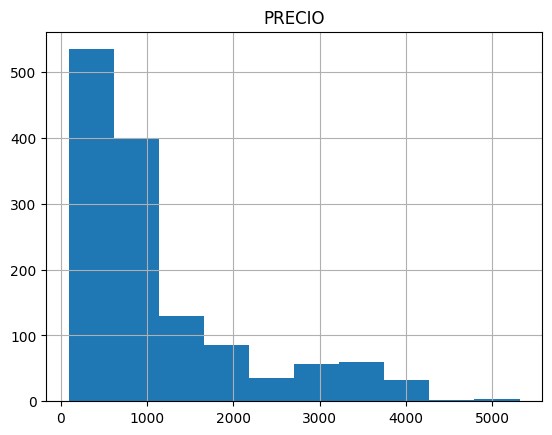

In [ ]:
df_seguro_clean.hist(column="PRECIO")

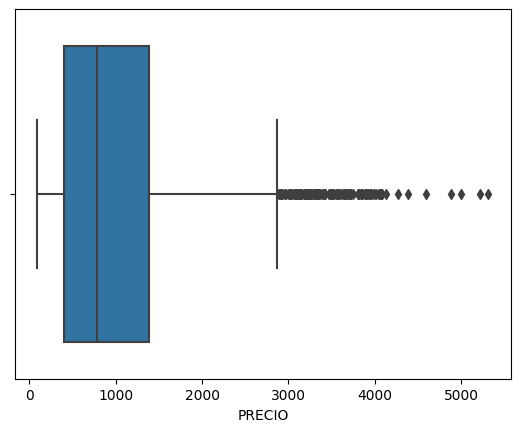

In [ ]:
outliers_precio = sns.boxplot(x=df_seguro_clean["PRECIO"])

In [ ]:
#El precio está afectado por una distribución de skewed, se recomienda normalizarlo para que siga una distribución normal
df_seguro_clean["LOG_PRECIO"]=np.log10(df_seguro_clean["PRECIO"])


array([[<Axes: title={'center': 'LOG_PRECIO'}>]], dtype=object)

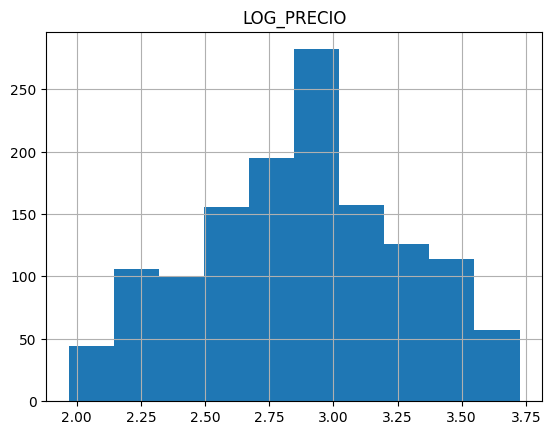

In [ ]:
df_seguro_clean.hist(column="LOG_PRECIO")

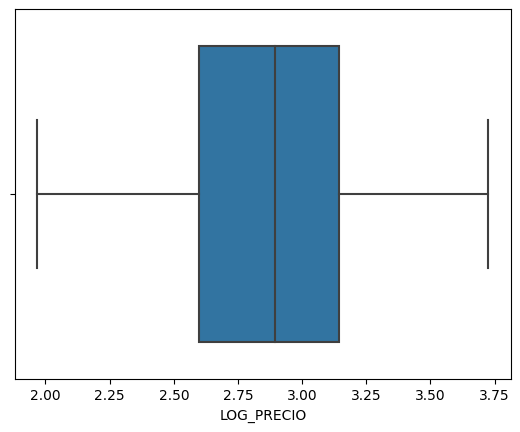

In [ ]:
outliers_precio2 = sns.boxplot(x=df_seguro_clean["LOG_PRECIO"])

In [ ]:
'''7.3 TARGET VS VARIABLES INDEPENDIENTES'''

In [ ]:
df_seguro_clean.head()

,EDAD,SEXO,IMC,HIJOS,TIENE_HIJOS,FUMADOR,CIUDAD,PRECIO,LOG_PRECIO
0,37,MASCULINO,29.830,2,1,NO,BARCELONA,534,2.727541
1,25,MASCULINO,26.220,0,0,NO,BARCELONA,227,2.356026
2,52,FEMENINO,30.780,1,1,NO,BARCELONA,900,2.954243
3,23,MASCULINO,23.845,0,0,NO,BARCELONA,200,2.301030
4,60,FEMENINO,36.005,0,0,NO,BARCELONA,1102,3.042182


<Axes: xlabel='SEXO', ylabel='PRECIO'>

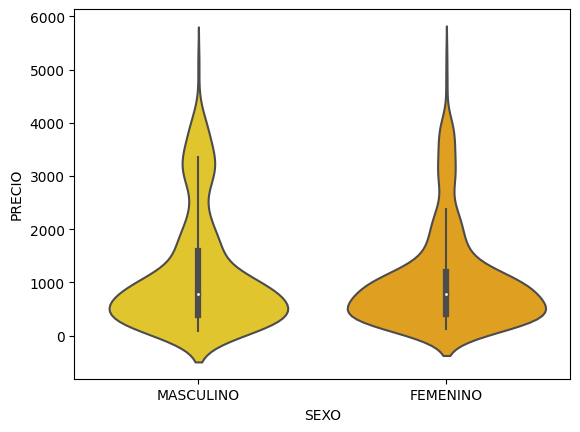

In [ ]:
#SEXO VS PRECIO
sns.violinplot(x="SEXO",y="PRECIO", data=df_seguro_clean, palette="Wistia")

<Axes: xlabel='FUMADOR', ylabel='PRECIO'>

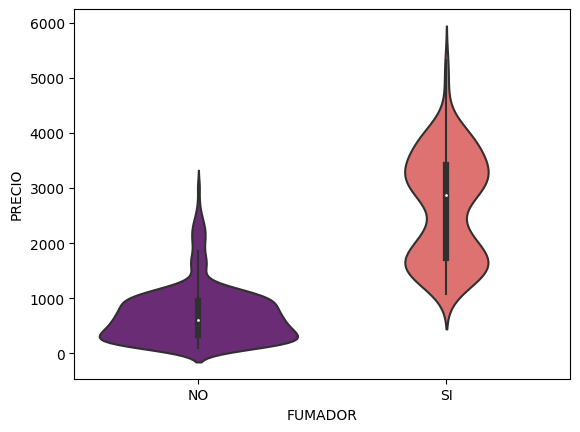

In [ ]:
#FUMADOR VS PRECIO
sns.violinplot(x="FUMADOR",y="PRECIO", data=df_seguro_clean, palette="magma")

In [ ]:
#Se puede observar que sexo no altera el precio, sin embargo que sea fumador sí

<Axes: xlabel='HIJOS', ylabel='PRECIO'>

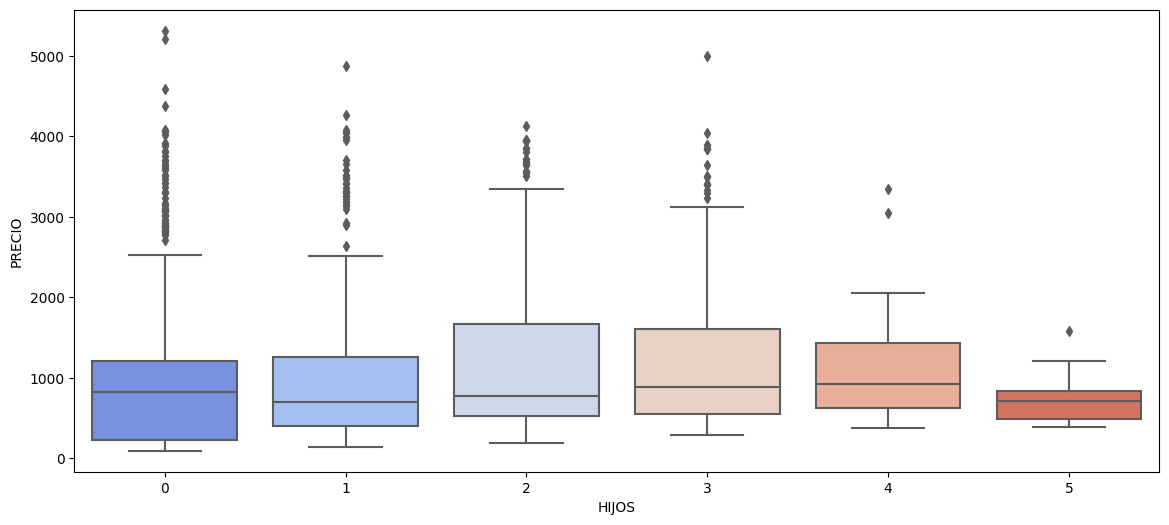

In [ ]:
#RELACION HIJOS VS PRECIO
plt.figure(figsize=(14,6))
sns.boxplot(x="HIJOS",y="PRECIO",  data=df_seguro_clean, palette="coolwarm")

In [ ]:
df_seguro_clean.groupby("HIJOS").agg(["mean","min","max"])["PRECIO"]

<ipython-input-39-3e038cbf94a8>:1: FutureWarning: ['SEXO', 'FUMADOR', 'CIUDAD'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  df_seguro_clean.groupby("HIJOS").agg(["mean","min","max"])["PRECIO"]


,mean,min,max
HIJOS,,,
0,1035.560764,93,5314
1,1058.074534,143,4881
2,1252.648536,192,4131
3,1279.585987,287,5002
4,1154.200000,375,3349
5,732.222222,391,1585


<Axes: xlabel='HIJOS', ylabel='PRECIO'>

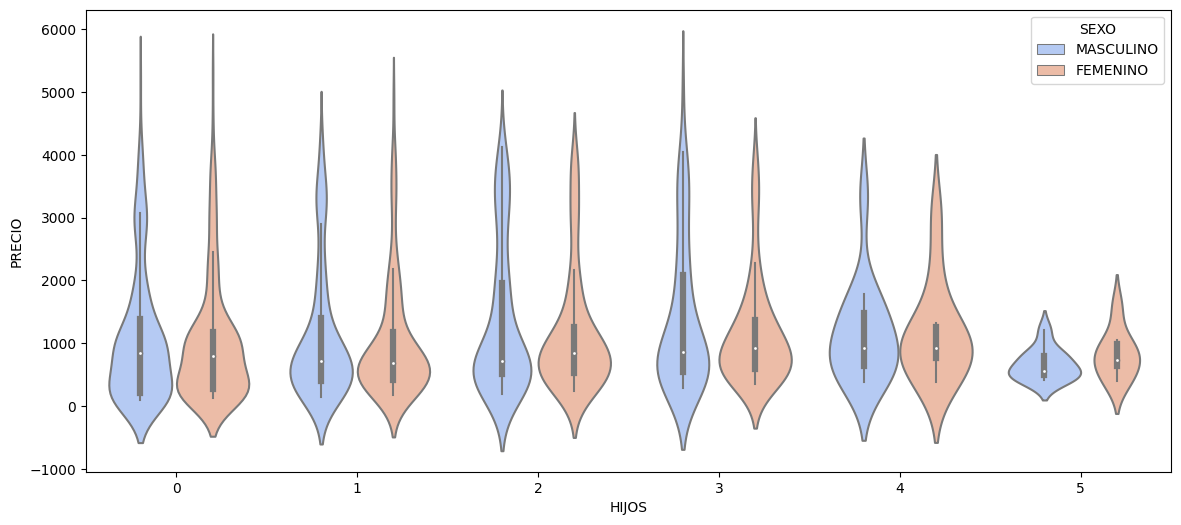

In [ ]:
#RELACION HIJOS VS SEXO VS PRECIO
plt.figure(figsize=(14,6))
sns.violinplot(x="HIJOS",y="PRECIO", hue="SEXO",  data=df_seguro_clean, palette="coolwarm")

<Axes: xlabel='EDAD', ylabel='PRECIO'>

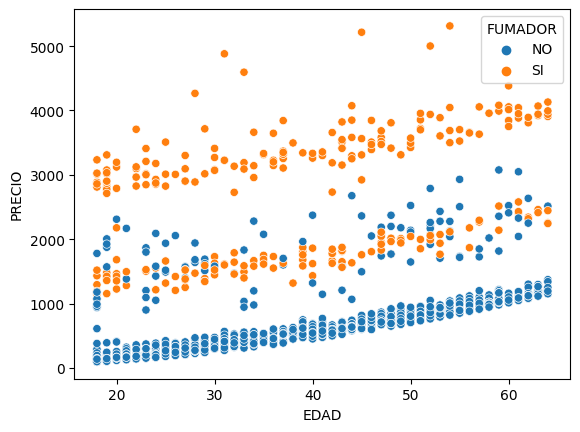

In [ ]:
#EDAD VS FUMADOR VS PRECIO
sns.scatterplot(x="EDAD", y="PRECIO", hue="FUMADOR",data=df_seguro_clean)

<Axes: xlabel='IMC', ylabel='PRECIO'>

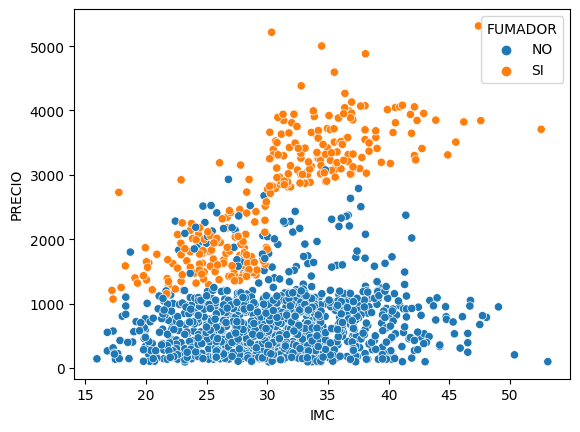

In [ ]:
#IMC VS FUMADOR VS PRECIO
sns.scatterplot(x="IMC", y="PRECIO",hue="FUMADOR",data=df_seguro_clean)

<Axes: xlabel='CIUDAD', ylabel='PRECIO'>

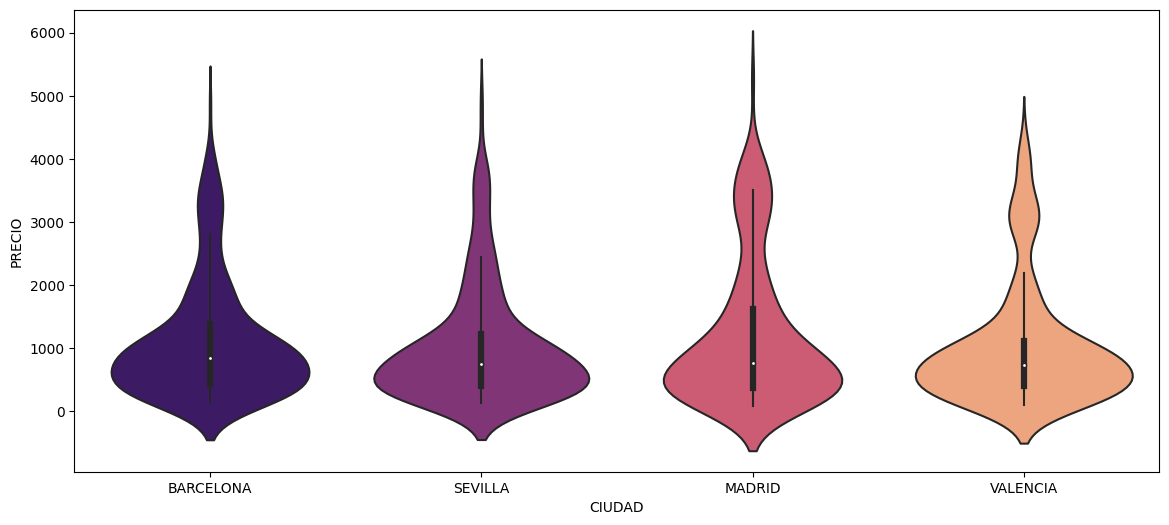

In [ ]:
#CIUDAD VS PRECIO
plt.figure(figsize=(14,6))
sns.violinplot(x="CIUDAD",y="PRECIO", data=df_seguro_clean, palette="magma")

In [ ]:
'''7.4 REESCALAR VARIABLES'''

In [ ]:
'''
Nuestro objetivo es predecir el precio del seguro médico, vamos a utilizar las siguientes estrategias
Label Encoding
One Hot Encoding
Min max scaling
'''

In [ ]:
df_seguro_clean.dtypes

EDAD             int64
SEXO            object
IMC            float64
HIJOS            int64
TIENE_HIJOS      int64
FUMADOR         object
CIUDAD          object
PRECIO           int64
LOG_PRECIO     float64
dtype: object

In [ ]:
df_seguro_clean.head()

,EDAD,SEXO,IMC,HIJOS,TIENE_HIJOS,FUMADOR,CIUDAD,PRECIO,LOG_PRECIO
0,37,MASCULINO,29.830,2,1,NO,BARCELONA,534,2.727541
1,25,MASCULINO,26.220,0,0,NO,BARCELONA,227,2.356026
2,52,FEMENINO,30.780,1,1,NO,BARCELONA,900,2.954243
3,23,MASCULINO,23.845,0,0,NO,BARCELONA,200,2.301030
4,60,FEMENINO,36.005,0,0,NO,BARCELONA,1102,3.042182


In [ ]:
df_seguro_prep=df_seguro_clean.copy()

In [ ]:
target=["PRECIO","LOG_PRECIO"]

In [ ]:
lista_numericas2, lista_boolean2, lista_categoricas2= obtener_lista_variables(df_seguro_prep)

In [ ]:

lista_numericas2

lista_boolean2

lista_categoricas2

['SEXO', 'FUMADOR', 'CIUDAD']

In [ ]:

le = LabelEncoder()
df_seguro_prep['CIUDAD2']= le.fit_transform(df_seguro_prep['CIUDAD'])

df_seguro_prep


,EDAD,SEXO,IMC,HIJOS,TIENE_HIJOS,FUMADOR,CIUDAD,PRECIO,LOG_PRECIO,CIUDAD2
0,37,MASCULINO,29.830,2,1,NO,BARCELONA,534,2.727541,0
1,25,MASCULINO,26.220,0,0,NO,BARCELONA,227,2.356026,0
2,52,FEMENINO,30.780,1,1,NO,BARCELONA,900,2.954243,0
3,23,MASCULINO,23.845,0,0,NO,BARCELONA,200,2.301030,0
4,60,FEMENINO,36.005,0,0,NO,BARCELONA,1102,3.042182,0
...,...,...,...,...,...,...,...,...,...,...
1332,19,FEMENINO,20.600,0,0,NO,VALENCIA,144,2.158362,3
1333,52,MASCULINO,38.600,2,1,NO,VALENCIA,860,2.934498,3
1334,23,FEMENINO,33.400,0,0,NO,VALENCIA,900,2.954243,3
1335,52,FEMENINO,44.700,3,1,NO,VALENCIA,951,2.978181,3


In [ ]:
#Poner una ciudad de 1 al 4 no es lo más recomendable, aplicaremos one hot encoding

In [ ]:
del(df_seguro_prep["CIUDAD2"])

In [ ]:
lista_numericas2.remove("HIJOS")

In [ ]:
lista_categoricas2.append("HIJOS")

In [ ]:
df_seguro_prep_cate=pd.get_dummies(data=df_seguro_prep,
                               prefix=None,
                               prefix_sep="_",
                               columns=lista_categoricas2,
                               drop_first="True")

In [ ]:
df_seguro_prep_cate

,EDAD,IMC,TIENE_HIJOS,PRECIO,LOG_PRECIO,SEXO_MASCULINO,FUMADOR_SI,CIUDAD_MADRID,CIUDAD_SEVILLA,CIUDAD_VALENCIA,HIJOS_1,HIJOS_2,HIJOS_3,HIJOS_4,HIJOS_5
0,37,29.830,1,534,2.727541,1,0,0,0,0,0,1,0,0,0
1,25,26.220,0,227,2.356026,1,0,0,0,0,0,0,0,0,0
2,52,30.780,1,900,2.954243,0,0,0,0,0,1,0,0,0,0
3,23,23.845,0,200,2.301030,1,0,0,0,0,0,0,0,0,0
4,60,36.005,0,1102,3.042182,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1332,19,20.600,0,144,2.158362,0,0,0,0,1,0,0,0,0,0
1333,52,38.600,1,860,2.934498,1,0,0,0,1,0,1,0,0,0
1334,23,33.400,0,900,2.954243,0,0,0,0,1,0,0,0,0,0
1335,52,44.700,1,951,2.978181,0,0,0,0,1,0,0,1,0,0


In [ ]:
df_seguro_prep_cate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1337 entries, 0 to 1336
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   EDAD             1337 non-null   int64  
 1   IMC              1337 non-null   float64
 2   TIENE_HIJOS      1337 non-null   int64  
 3   PRECIO           1337 non-null   int64  
 4   LOG_PRECIO       1337 non-null   float64
 5   SEXO_MASCULINO   1337 non-null   uint8  
 6   FUMADOR_SI       1337 non-null   uint8  
 7   CIUDAD_MADRID    1337 non-null   uint8  
 8   CIUDAD_SEVILLA   1337 non-null   uint8  
 9   CIUDAD_VALENCIA  1337 non-null   uint8  
 10  HIJOS_1          1337 non-null   uint8  
 11  HIJOS_2          1337 non-null   uint8  
 12  HIJOS_3          1337 non-null   uint8  
 13  HIJOS_4          1337 non-null   uint8  
 14  HIJOS_5          1337 non-null   uint8  
dtypes: float64(2), int64(3), uint8(10)
memory usage: 65.4 KB


In [ ]:
corr = df_seguro_prep_cate.corr()

In [ ]:
corr.style.background_gradient(cmap='coolwarm')

,EDAD,IMC,TIENE_HIJOS,PRECIO,LOG_PRECIO,SEXO_MASCULINO,FUMADOR_SI,CIUDAD_MADRID,CIUDAD_SEVILLA,CIUDAD_VALENCIA,HIJOS_1,HIJOS_2,HIJOS_3,HIJOS_4,HIJOS_5
EDAD,1.000000,0.107742,0.044213,0.298308,0.526933,-0.019542,-0.025587,-0.012311,0.001495,0.009415,0.006911,0.008052,0.060921,-0.002184,-0.030047
IMC,0.107742,1.000000,0.013901,0.197793,0.131903,0.048800,0.003428,0.269794,-0.136556,-0.006571,-0.004578,0.022545,0.001020,0.016394,-0.020359
TIENE_HIJOS,0.044213,0.013901,1.000000,0.061246,0.149085,0.020126,0.011388,-0.000622,0.030259,0.007095,0.490020,0.405898,0.317342,0.120094,0.101633
PRECIO,0.298308,0.197793,0.061246,1.000000,0.893079,0.058033,0.787238,0.073575,-0.038700,-0.043637,-0.027081,0.067553,0.062555,0.006516,-0.043350
LOG_PRECIO,0.526933,0.131903,0.149085,0.893079,1.000000,0.007614,0.665713,0.014998,-0.015460,-0.042485,-0.005425,0.098975,0.106840,0.038938,-0.012550
SEXO_MASCULINO,-0.019542,0.048800,0.020126,0.058033,0.007614,1.000000,0.075079,0.015749,-0.014174,-0.005462,0.013830,-0.000076,0.002332,0.014811,0.011495
FUMADOR_SI,-0.025587,0.003428,0.011388,0.787238,0.665713,0.075079,1.000000,0.068282,-0.036321,-0.037168,-0.021622,0.029114,0.039283,-0.029046,-0.043231
CIUDAD_MADRID,-0.012311,0.269794,-0.000622,0.073575,0.014998,0.015749,0.068282,1.000000,-0.345909,-0.346614,0.028825,0.004087,-0.040417,-0.022406,0.016031
CIUDAD_SEVILLA,0.001495,-0.136556,0.030259,-0.038700,-0.015460,-0.014174,-0.036321,-0.345909,1.000000,-0.320493,-0.016457,0.036820,0.043125,-0.000752,-0.050921
CIUDAD_VALENCIA,0.009415,-0.006571,0.007095,-0.043637,-0.042485,-0.005462,-0.037168,-0.346614,-0.320493,1.000000,-0.001110,-0.004990,-0.006304,0.011881,0.054839


In [ ]:
#Se puede tunear aún más los datos...los numéricos!
df_seguro_prep_cate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1337 entries, 0 to 1336
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   EDAD             1337 non-null   int64  
 1   IMC              1337 non-null   float64
 2   TIENE_HIJOS      1337 non-null   int64  
 3   PRECIO           1337 non-null   int64  
 4   LOG_PRECIO       1337 non-null   float64
 5   SEXO_MASCULINO   1337 non-null   uint8  
 6   FUMADOR_SI       1337 non-null   uint8  
 7   CIUDAD_MADRID    1337 non-null   uint8  
 8   CIUDAD_SEVILLA   1337 non-null   uint8  
 9   CIUDAD_VALENCIA  1337 non-null   uint8  
 10  HIJOS_1          1337 non-null   uint8  
 11  HIJOS_2          1337 non-null   uint8  
 12  HIJOS_3          1337 non-null   uint8  
 13  HIJOS_4          1337 non-null   uint8  
 14  HIJOS_5          1337 non-null   uint8  
dtypes: float64(2), int64(3), uint8(10)
memory usage: 65.4 KB


In [ ]:
def minmaxTransformacion(variable_transformar):
    minMaxResultado=MinMaxScaler()
    df_seguro_prep_cate[variable_transformar]=minMaxResultado.fit_transform(df_seguro_prep_cate[variable_transformar].values.reshape(-1,1))
    return minMaxResultado

In [ ]:
minMax_edad=minmaxTransformacion("EDAD")


In [ ]:
minMax_IMC=minmaxTransformacion("IMC")


In [ ]:
df_seguro_prep_cate

,EDAD,IMC,TIENE_HIJOS,PRECIO,LOG_PRECIO,SEXO_MASCULINO,FUMADOR_SI,CIUDAD_MADRID,CIUDAD_SEVILLA,CIUDAD_VALENCIA,HIJOS_1,HIJOS_2,HIJOS_3,HIJOS_4,HIJOS_5
0,0.413043,0.373150,1,534,2.727541,1,0,0,0,0,0,1,0,0,0
1,0.152174,0.276029,0,227,2.356026,1,0,0,0,0,0,0,0,0,0
2,0.739130,0.398709,1,900,2.954243,0,0,0,0,0,1,0,0,0,0
3,0.108696,0.212133,0,200,2.301030,1,0,0,0,0,0,0,0,0,0
4,0.913043,0.539279,0,1102,3.042182,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1332,0.021739,0.124832,0,144,2.158362,0,0,0,0,1,0,0,0,0,0
1333,0.739130,0.609093,1,860,2.934498,1,0,0,0,1,0,1,0,0,0
1334,0.108696,0.469196,0,900,2.954243,0,0,0,0,1,0,0,0,0,0
1335,0.739130,0.773204,1,951,2.978181,0,0,0,0,1,0,0,1,0,0


In [ ]:
data_final=df_seguro_prep_cate.copy()


In [ ]:
data_final


,EDAD,IMC,TIENE_HIJOS,PRECIO,LOG_PRECIO,SEXO_MASCULINO,FUMADOR_SI,CIUDAD_MADRID,CIUDAD_SEVILLA,CIUDAD_VALENCIA,HIJOS_1,HIJOS_2,HIJOS_3,HIJOS_4,HIJOS_5
0,0.413043,0.373150,1,534,2.727541,1,0,0,0,0,0,1,0,0,0
1,0.152174,0.276029,0,227,2.356026,1,0,0,0,0,0,0,0,0,0
2,0.739130,0.398709,1,900,2.954243,0,0,0,0,0,1,0,0,0,0
3,0.108696,0.212133,0,200,2.301030,1,0,0,0,0,0,0,0,0,0
4,0.913043,0.539279,0,1102,3.042182,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1332,0.021739,0.124832,0,144,2.158362,0,0,0,0,1,0,0,0,0,0
1333,0.739130,0.609093,1,860,2.934498,1,0,0,0,1,0,1,0,0,0
1334,0.108696,0.469196,0,900,2.954243,0,0,0,0,1,0,0,0,0,0
1335,0.739130,0.773204,1,951,2.978181,0,0,0,0,1,0,0,1,0,0


In [ ]:
pd.to_pickle(data_final,"/content/drive/MyDrive/Colab Notebooks/Clase 3 - Preprocesamiento/Datasets/data_final_pk")

In [ ]:
df_fin=pd.read_pickle("/content/drive/MyDrive/Colab Notebooks/Clase 3 - Preprocesamiento/Datasets/data_final_pk")

In [ ]:
df_fin.head()

In [ ]:
'''LISTO PARA APLICAR MODELOS DE MACHINE LEARNING :)'''